<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


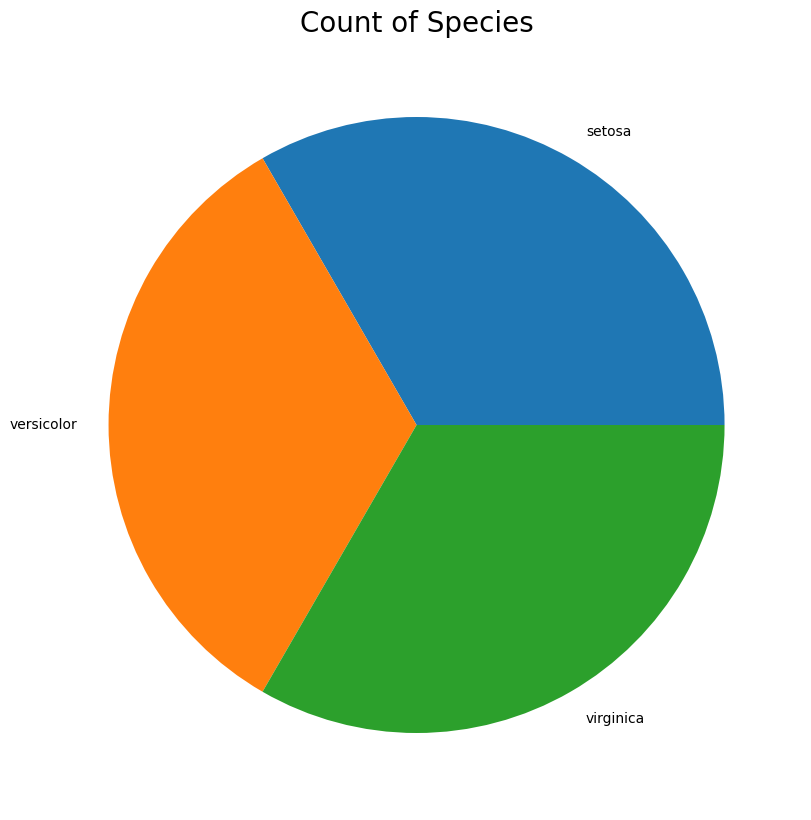

C:\Users\mukhe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


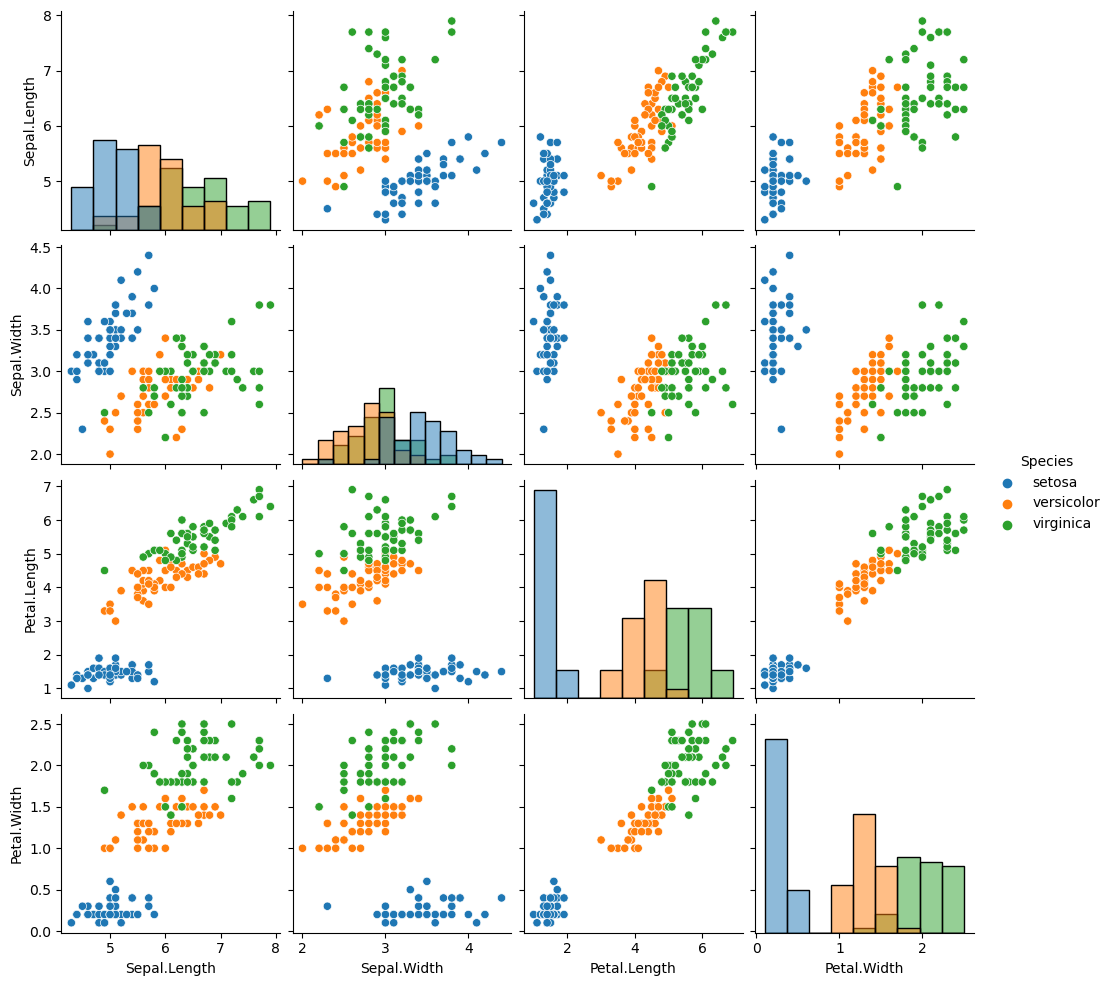

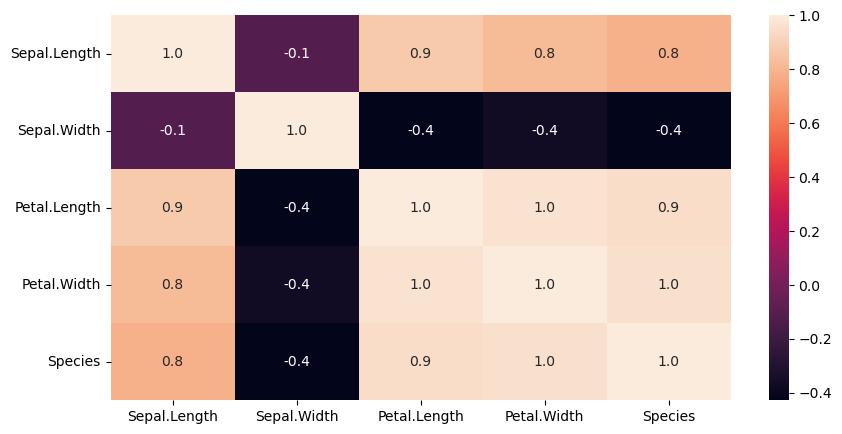

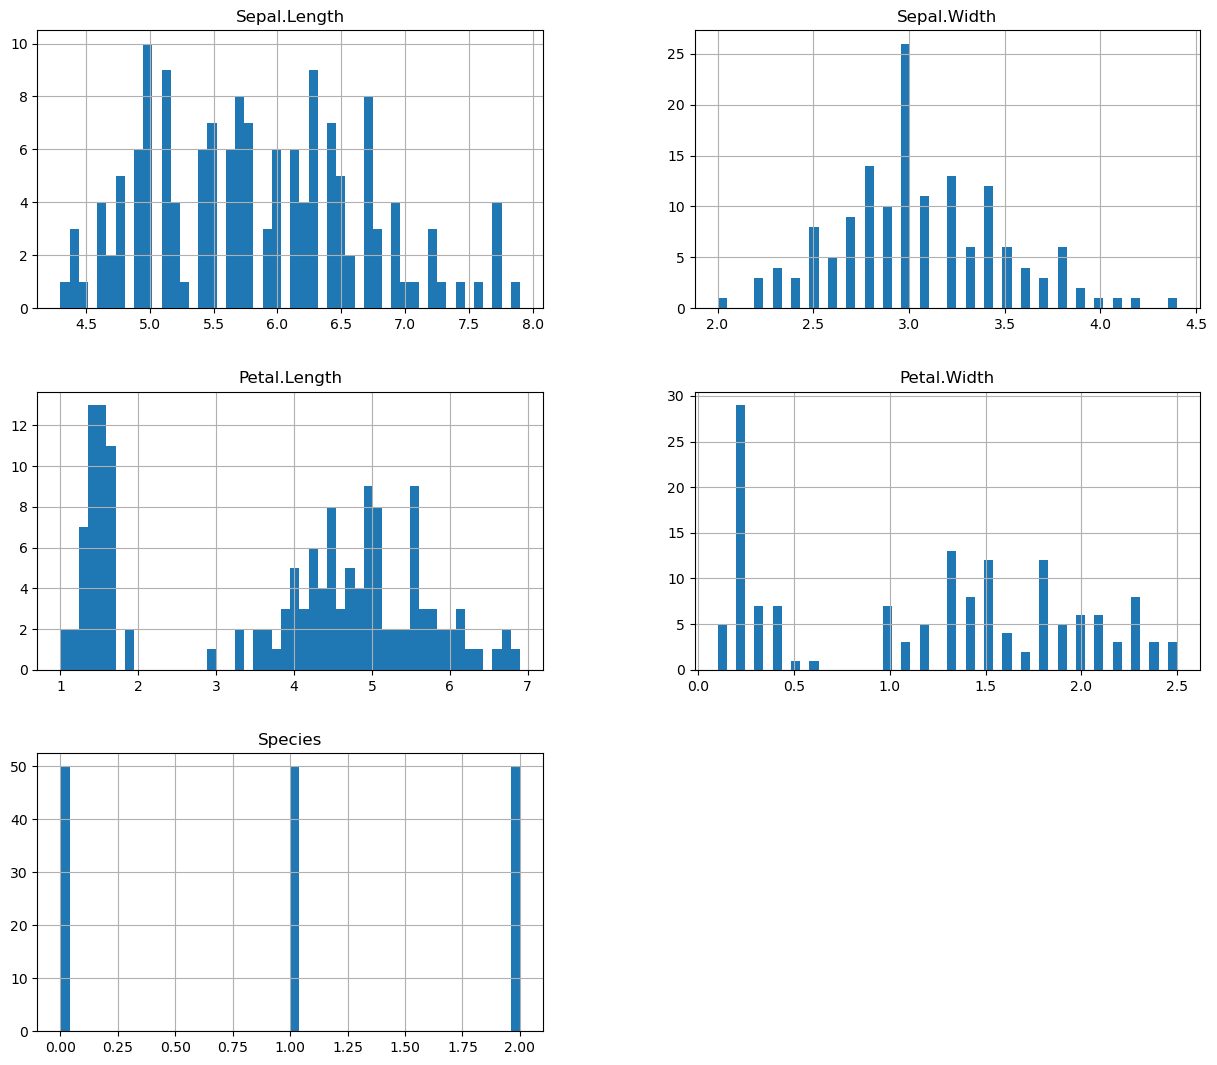

Accuracy: 98.33333333333333
R-squared (R^2): 97.43480119709278
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
setosa


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, r2_score
iris = pd.read_csv("IRIS.csv")
iris.head(10)
iris.shape

iris.describe()
iris.info()
iris.isnull().sum()
iris = iris.drop('ID',axis=1)
iris.groupby('Species').mean()
count =  iris.Species.value_counts()
print(count)

plt.figure(figsize=(10,10))
plt.pie(count,labels=iris.Species.unique().tolist())
plt.title("Count of Species",fontsize=20)
plt.show()
sb.pairplot(iris,hue="Species",diag_kind="hist")
iris["Species"] = iris["Species"].map({'setosa': 0,'versicolor': 1,'virginica':2})
plt.figure(figsize=(10,5))
sb.heatmap(iris.corr(),annot=True,fmt='0.1f')
plt.show()
iris.hist(figsize=(15,13),bins=50)
plt.show()
x = iris.drop('Species',axis=1)
y = iris['Species']
x.head()
y.head()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=5)
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy*100}')
print(f'R-squared (R^2): {r2_logistic*100}')
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
new_data = pd.DataFrame({
    'Sepal.Length':4.6,
    'Sepal.Width':3.2,
    'Petal.Length':1.5,
    'Petal.Width':0.2,
     
},index=[0])

prediction = model_logistic.predict(new_data)

if prediction[0]== 0:
    print("setosa")
elif prediction[0] == 1:
    print("versicolor")
else:
    print("virginica")